In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# seperating the categorical and numerical columns

catvars = list(df.select_dtypes(include=['object']).columns)

numvars = list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)


print(catvars,numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Handling Null values

In [6]:
df.shape

(215, 15)

In [7]:
def plotdistplot(col):
    
    plt.figure(figsize=(15,7))
    sn.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sn.distplot(df[col],kde=True,hist=False,label=col,color='black')
    

In [8]:
mostfreq = list(dict(df['salary'].value_counts()).items())[0]
mostfreq

(300000.0, 22)

In [9]:
df['salary'].mode()[0]

300000.0

In [10]:
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


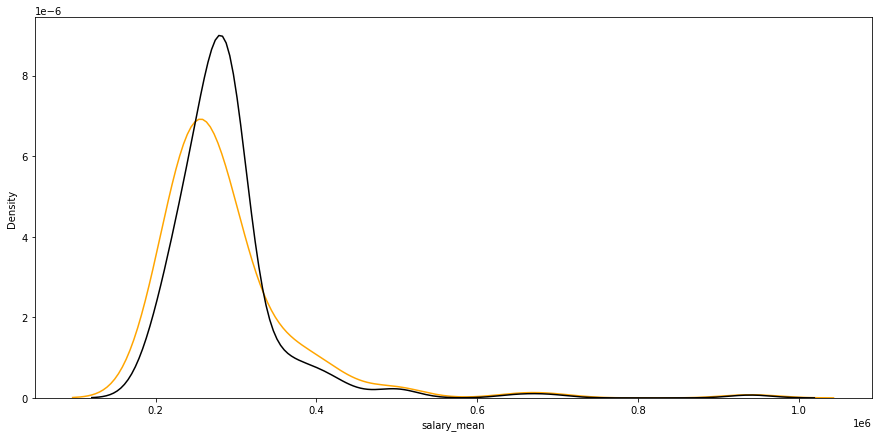

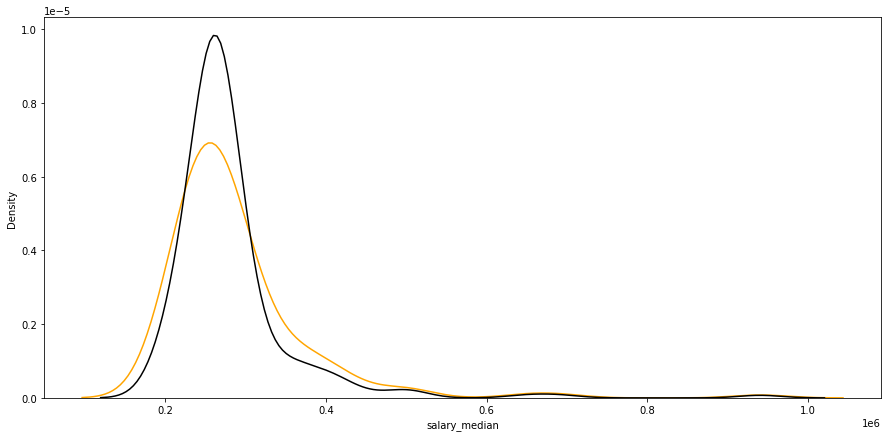

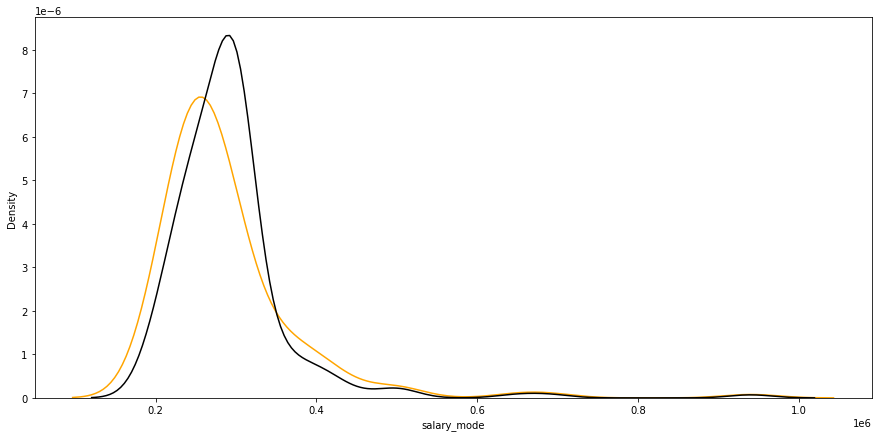

In [12]:
import warnings
warnings.filterwarnings("ignore")
sallist = ['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

In [13]:
# filling the salary with mean

df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [14]:
df = df.drop(columns=['salary_mean', 'salary_median', 'salary_mode'],axis=1)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## EDA

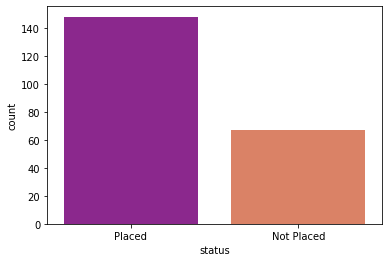

In [15]:
sn.countplot(df['status'],palette='plasma')

Count Plot for feature gender is shown ↓


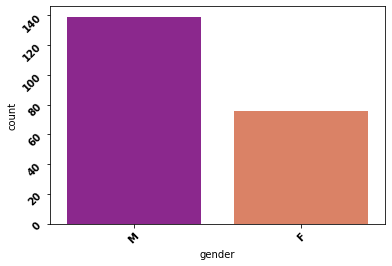

Count Plot for feature ssc_b is shown ↓


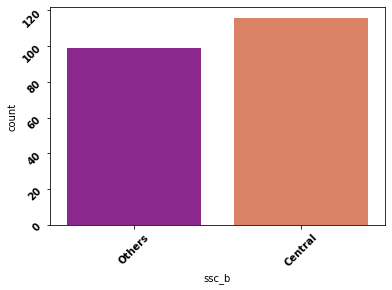

Count Plot for feature hsc_b is shown ↓


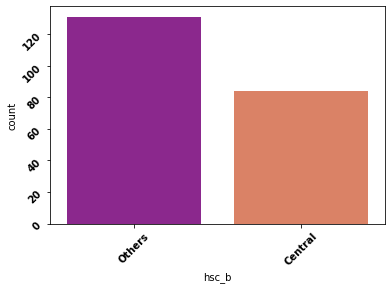

Count Plot for feature hsc_s is shown ↓


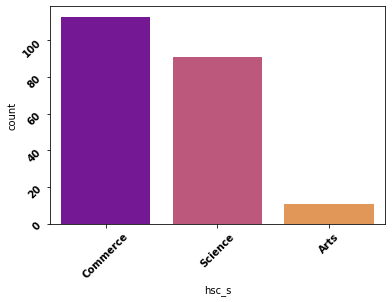

Count Plot for feature degree_t is shown ↓


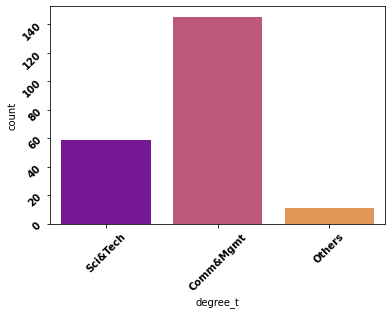

Count Plot for feature workex is shown ↓


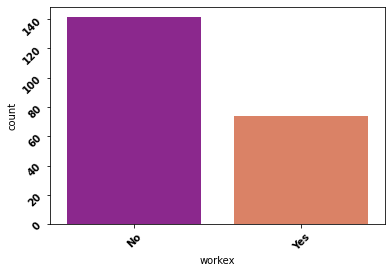

Count Plot for feature specialisation is shown ↓


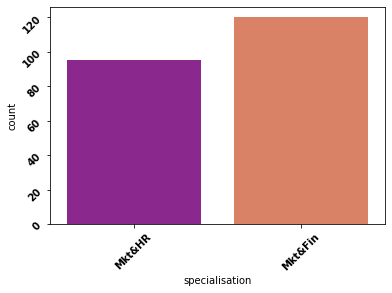

Count Plot for feature status is shown ↓


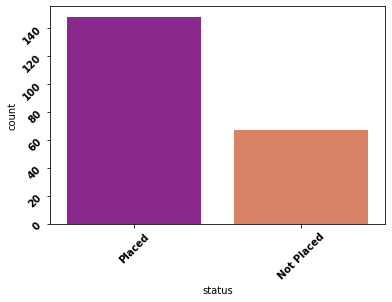

In [16]:
def valuecount(col):
    
    return dict(df[col].value_counts())

def getcountplot(col):
    
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation = '45',fontweight = 'bold',fontsize = '10')
    plt.yticks(rotation = '45',fontweight = 'bold',fontsize = '10')
    plt.show()
    

for col in catvars:
    print(f'Count Plot for feature {col} is shown ↓')
    getcountplot(col)
    print('='*75)

In [17]:
getfinaldict = {}
for col in catvars:
    getfinaldict[col] = valuecount(col)
    
getfinaldict

{'degree_t': {'Comm&Mgmt': 145, 'Others': 11, 'Sci&Tech': 59},
 'gender': {'F': 76, 'M': 139},
 'hsc_b': {'Central': 84, 'Others': 131},
 'hsc_s': {'Arts': 11, 'Commerce': 113, 'Science': 91},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'ssc_b': {'Central': 116, 'Others': 99},
 'status': {'Not Placed': 67, 'Placed': 148},
 'workex': {'No': 141, 'Yes': 74}}

In [18]:
# top science students placed

df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
    

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [19]:
# top Comm&Mgt students placed

df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
 

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [20]:
# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [21]:
# students with salary more than avg salary science dept

df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.000000
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.000000
2,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.000000
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.000000
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.000000
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.000000
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.000000
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.000000
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.000000
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.000000


In [22]:
# students with salary more than avg salary Comm&Mgmt dept

df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.000000
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.000000
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.000000
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.000000
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,120,121,M,58.0,Others,40.0,Others,Science,59.0,Comm&Mgmt,No,73.00,Mkt&HR,58.81,Not Placed,288655.405405
71,29,30,M,62.0,Central,67.0,Central,Commerce,58.0,Comm&Mgmt,No,77.00,Mkt&Fin,51.29,Not Placed,288655.405405
72,36,37,M,51.0,Central,44.0,Central,Commerce,57.0,Comm&Mgmt,No,64.00,Mkt&Fin,51.45,Not Placed,288655.405405
73,136,137,F,47.0,Central,59.0,Central,Arts,64.0,Comm&Mgmt,No,78.00,Mkt&Fin,61.58,Not Placed,288655.405405


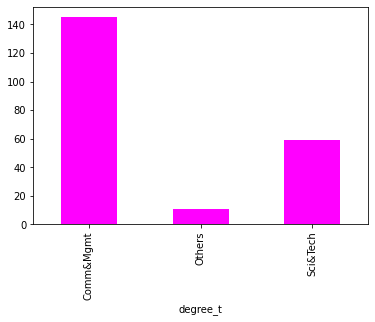

In [23]:
# maximum students placed are from comm&mgt

df.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'magenta')

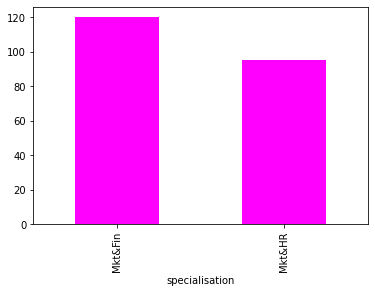

In [24]:
# Marketing and Finance specialisation are placed more

df.groupby(['specialisation'])['status'].count().plot(kind = 'bar',color = 'magenta')

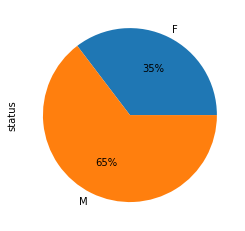

In [25]:
# females placed 35% and males 65%

df.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%')

In [26]:
# max female salary ~ 6,50,000

temp = df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap = 'plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


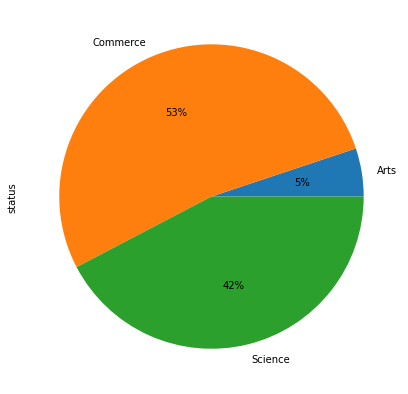

In [27]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

In [28]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [29]:
getfinaldict

{'degree_t': {'Comm&Mgmt': 145, 'Others': 11, 'Sci&Tech': 59},
 'gender': {'F': 76, 'M': 139},
 'hsc_b': {'Central': 84, 'Others': 131},
 'hsc_s': {'Arts': 11, 'Commerce': 113, 'Science': 91},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'ssc_b': {'Central': 116, 'Others': 99},
 'status': {'Not Placed': 67, 'Placed': 148},
 'workex': {'No': 141, 'Yes': 74}}

In [30]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

In [31]:
boolcols = [key for key,value in getfinaldict.items() if len(getfinaldict[key])==2]
tripcols = [key for key in list(getfinaldict.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


## Label Encoding process

In [32]:
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])
    
    
getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(getfinaldict.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    

df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [33]:
# this was the internal mapping structure followed by label encoder for mapping

getmappings

{'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'gender': {'F': 0, 'M': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'status': {'Not Placed': 0, 'Placed': 1},
 'workex': {'No': 0, 'Yes': 1}}

In [34]:
# removing unwated columns

df = df.drop(['sl_no'],axis=1)
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


## Numerical Columns EDA

In [35]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col : ssc_p are shown ↓


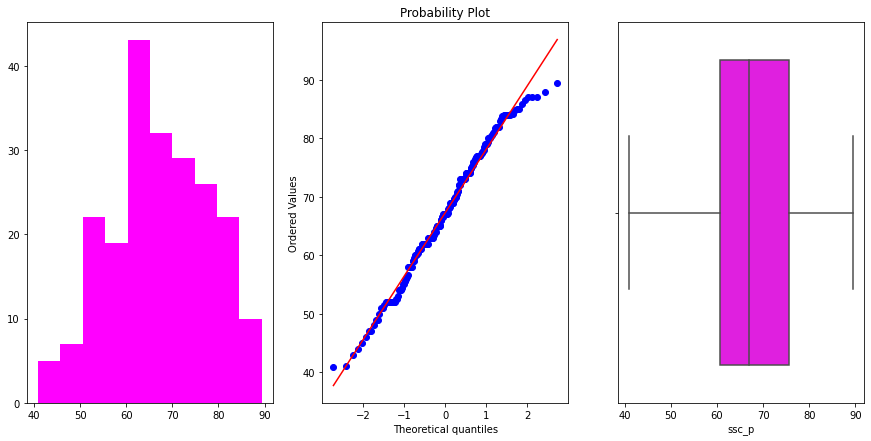

Distribution plots for col : hsc_p are shown ↓


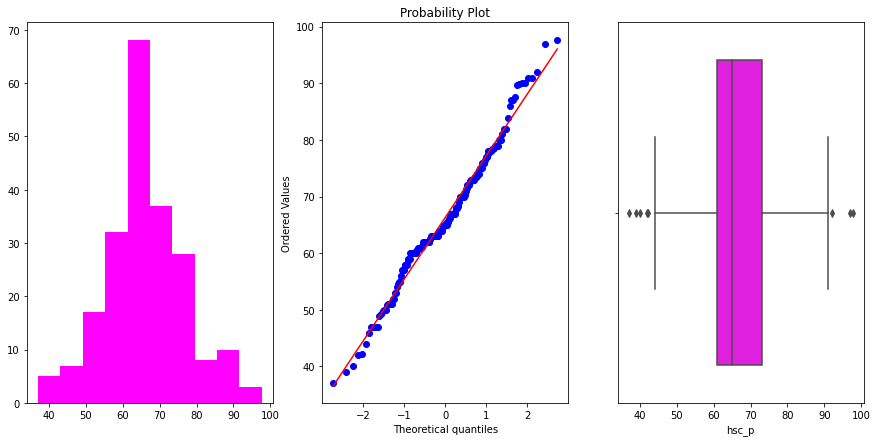

Distribution plots for col : degree_p are shown ↓


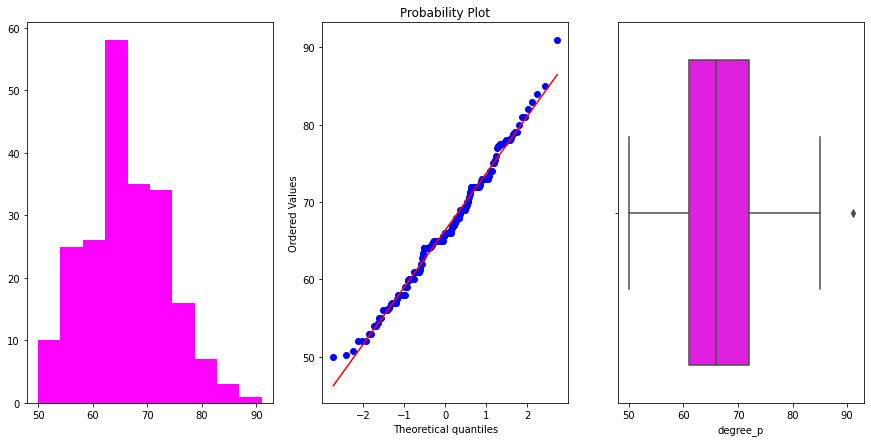

Distribution plots for col : etest_p are shown ↓


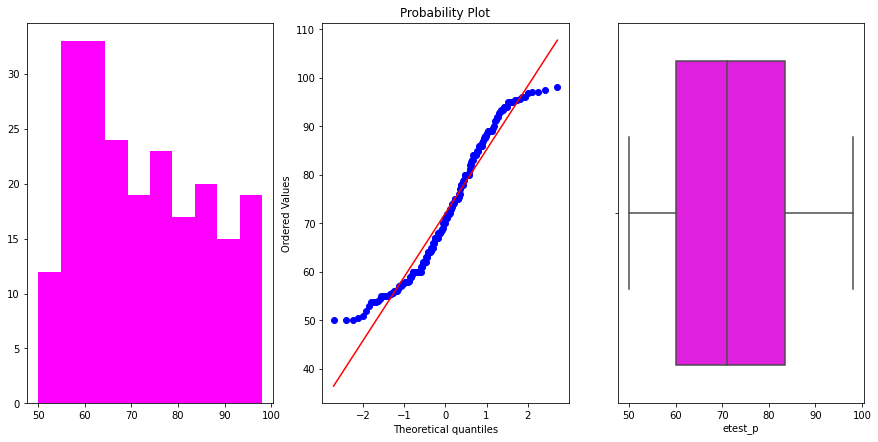

Distribution plots for col : mba_p are shown ↓


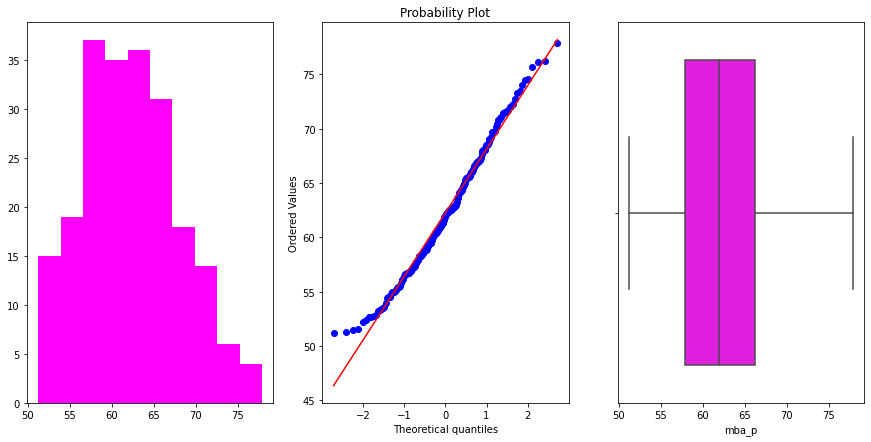

Distribution plots for col : salary are shown ↓


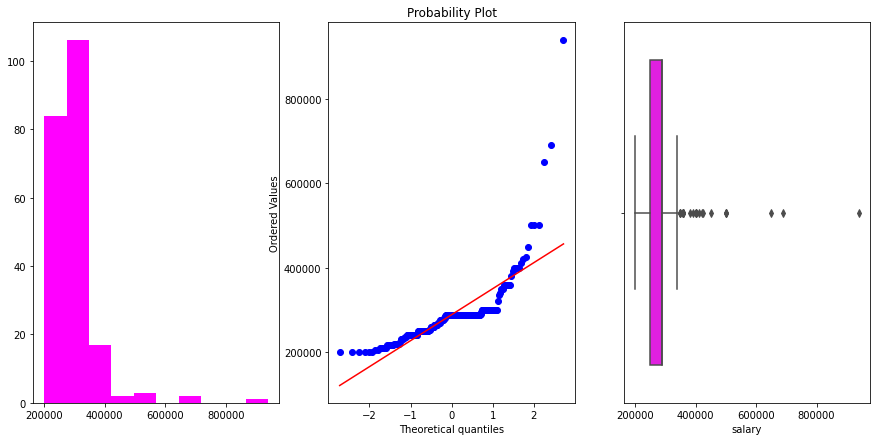

In [36]:
import scipy.stats as stats

def getplots(df,col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')
    
    plt.show()
    
    
for col in numvars[1:]:
    print(f'Distribution plots for col : {col} are shown ↓')
    getplots(df,col)
    print('='*10)

# Feature Selection

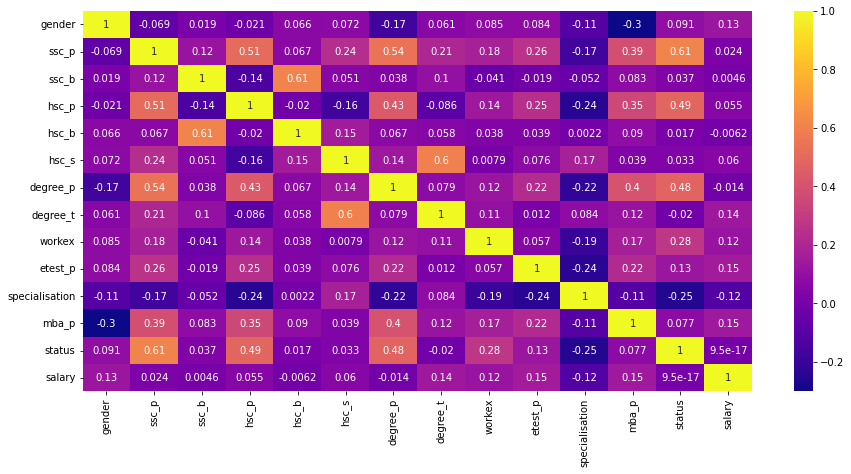

In [37]:
# checking for tightly correlated features

plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [38]:
'''
We will drop the salary column as well
coz after getting the placement we will get to know the salary right!

'''


data = df.copy()
test = data['status']
train = data.drop(['status','salary'],axis = 1)
train.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28


In [39]:
## extratrees classifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

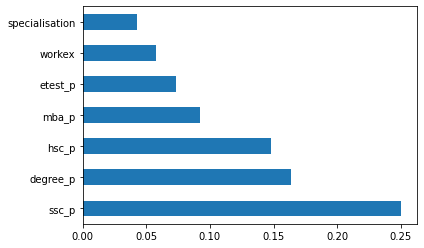

In [40]:
featbar = pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

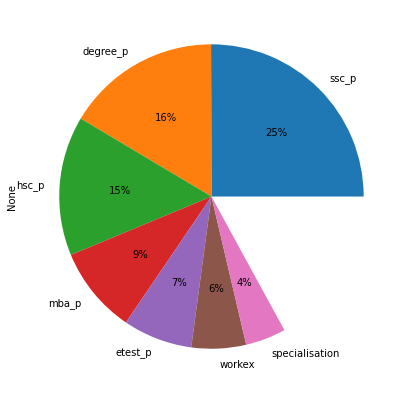

In [41]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

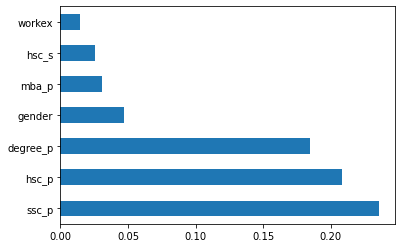

In [42]:
# mutual classif

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

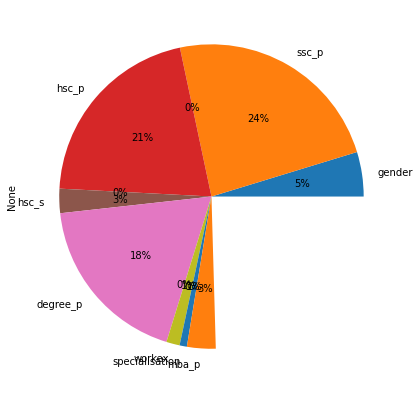

In [43]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [44]:
'''
Selecting the top 10 contributing features in both cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features!

'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['specialisation', 'gender', 'degree_p', 'workex', 'ssc_p', 'hsc_p', 'mba_p', 'hsc_s']


In [45]:
# selecting the common cols and will do training on these cols!
# these cols were selected as a nlargest result of 2 feature selection techniques!

train = df[commoncols]
train.head()

,specialisation,gender,degree_p,workex,ssc_p,hsc_p,mba_p,hsc_s
0,1,1,58.00,0,67.00,91.00,58.80,1
1,0,1,77.48,1,79.33,78.33,66.28,2
2,0,1,64.00,0,65.00,68.00,57.80,0
3,1,1,52.00,0,56.00,52.00,59.43,2
4,0,1,73.30,0,85.80,73.60,55.50,1


In [46]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

{'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'gender': {'F': 0, 'M': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'status': {'Not Placed': 0, 'Placed': 1},
 'workex': {'No': 0, 'Yes': 1}}

In [49]:
# renaming the cols

train = train[['gender','specialisation','degree_p','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns = ['Gender','Specialisation','Techinal Degree','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()


,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,58.00,0,67.00,91.00,58.00,58.80
1,1,0,77.48,1,79.33,78.33,77.48,66.28
2,1,0,64.00,0,65.00,68.00,64.00,57.80
3,1,1,52.00,0,56.00,52.00,52.00,59.43
4,1,0,73.30,0,85.80,73.60,73.30,55.50


In [50]:
train['Techinal Degree'].value_counts()

65.00    20
66.00    13
72.00    12
64.00    11
58.00     9
         ..
66.40     1
64.33     1
70.67     1
64.21     1
77.25     1
Name: Techinal Degree, Length: 89, dtype: int64

## Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

[Text(370.30909090909086, 464.778, 'SSC_p <= 55.64\ngini = 0.435\nsamples = 172\nvalue = [55, 117]\nclass = Placed'),
 Text(121.74545454545454, 415.85400000000004, 'Techinal Degree <= 64.5\ngini = 0.124\nsamples = 30\nvalue = [28, 2]\nclass = Not_placed'),
 Text(81.16363636363636, 366.93, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = Not_placed'),
 Text(162.3272727272727, 366.93, 'High School_p <= 57.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Not_placed'),
 Text(121.74545454545454, 318.006, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not_placed'),
 Text(202.90909090909088, 318.006, 'Specialisation <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Placed'),
 Text(162.3272727272727, 269.082, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Placed'),
 Text(243.49090909090907, 269.082, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not_placed'),
 Text(618.8727272727273, 415.85400000000004, 'SSC_p <= 70.945\ngini = 0.308\nsamples = 142\nvalue = [27, 115]\

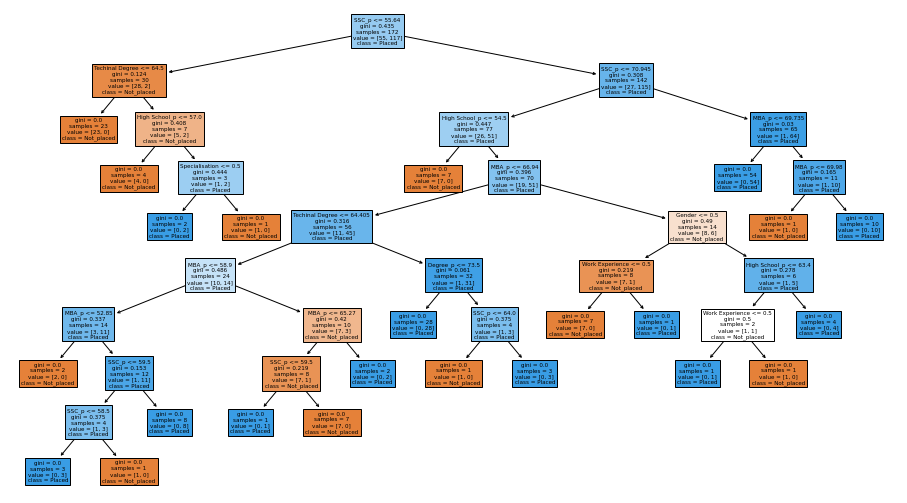

In [53]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [54]:
costpath = dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities = costpath.ccp_alphas,costpath.impurities

In [55]:
modellist = []
for alpha in ccp_alpha:
    dc = DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)
    

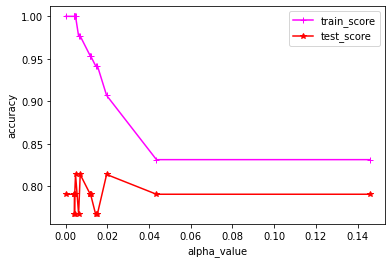

In [56]:
train_score = [clf.score(X_train,y_train) for clf in modellist]
test_score = [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label = 'train_score',marker = '+',color = 'magenta')
plt.plot(ccp_alpha,test_score,label = 'test_score',marker = '*',color = 'red')
plt.legend()
plt.show()

[Text(313.875, 348.81, 'SSC_p <= 55.64\ngini = 0.435\nsamples = 172\nvalue = [55, 117]\nclass = Placed'),
 Text(209.25, 285.39, 'gini = 0.124\nsamples = 30\nvalue = [28, 2]\nclass = Not_placed'),
 Text(418.5, 285.39, 'SSC_p <= 70.945\ngini = 0.308\nsamples = 142\nvalue = [27, 115]\nclass = Placed'),
 Text(313.875, 221.97, 'High School_p <= 54.5\ngini = 0.447\nsamples = 77\nvalue = [26, 51]\nclass = Placed'),
 Text(209.25, 158.55, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Not_placed'),
 Text(418.5, 158.55, 'MBA_p <= 66.94\ngini = 0.396\nsamples = 70\nvalue = [19, 51]\nclass = Placed'),
 Text(209.25, 95.13, 'Degree_p <= 64.405\ngini = 0.316\nsamples = 56\nvalue = [11, 45]\nclass = Placed'),
 Text(104.625, 31.710000000000036, 'gini = 0.486\nsamples = 24\nvalue = [10, 14]\nclass = Placed'),
 Text(313.875, 31.710000000000036, 'gini = 0.061\nsamples = 32\nvalue = [1, 31]\nclass = Placed'),
 Text(627.75, 95.13, 'Gender <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Not_pla

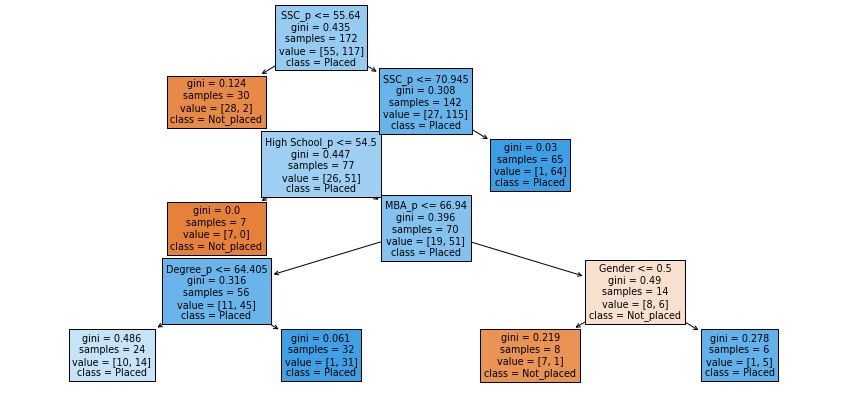

In [57]:
dc = DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

# Hyperparameter Tuning

In [58]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [59]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

In [60]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.849244,"(DecisionTreeClassifier(ccp_alpha=0.02, max_de..."
1,logistic,0.860840,"LogisticRegression(C=0.5, max_iter=167, solver..."
2,D-tree,0.837311,"DecisionTreeClassifier(ccp_alpha=0.0185, crite..."
3,SVM,0.837647,"SVC(max_iter=139, tol=1e-10)"


In [61]:
scores

[{'best_estimator': RandomForestClassifier(ccp_alpha=0.02, max_depth=30, min_samples_leaf=12,
                         min_samples_split=10, n_estimators=400),
  'best_score': 0.8492436974789916,
  'model_name': 'RandomForest'},
 {'best_estimator': LogisticRegression(C=0.5, max_iter=167, solver='newton-cg', tol=0.25),
  'best_score': 0.8608403361344539,
  'model_name': 'logistic'},
 {'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0185, criterion='entropy',
                         max_features='auto', min_samples_split=10),
  'best_score': 0.837310924369748,
  'model_name': 'D-tree'},
 {'best_estimator': SVC(max_iter=139, tol=1e-10),
  'best_score': 0.8376470588235294,
  'model_name': 'SVM'}]

In [62]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8372093023255814


In [63]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.8837209302325582


In [64]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6744186046511628


In [65]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



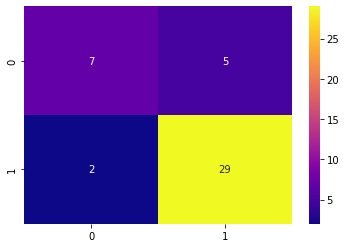

In [66]:
cn = metrics.confusion_matrix(y_test,rf.predict(X_test))
sn.heatmap(cn,annot=True,cmap='plasma')

# Model Testing

In [68]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted[:5]  ## printing only first 5 predicted result

[array([1]), array([1]), array([1]), array([0]), array([1])]

In [69]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,58.00,0,67.00,91.00,58.00,58.80,1,1
1,1,0,77.48,1,79.33,78.33,77.48,66.28,1,1
2,1,0,64.00,0,65.00,68.00,64.00,57.80,1,1
3,1,1,52.00,0,56.00,52.00,52.00,59.43,0,0
4,1,0,73.30,0,85.80,73.60,73.30,55.50,1,1


In [70]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [71]:
resultdf['Predicted'].value_counts()

1    160
0     55
Name: Predicted, dtype: int64

In [72]:
getmappings

{'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'gender': {'F': 0, 'M': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'status': {'Not Placed': 0, 'Placed': 1},
 'workex': {'No': 0, 'Yes': 1}}

### Predicted Probability

In [74]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted[:5]

[array([[0.42370671, 0.57629329]]),
 array([[0.06158923, 0.93841077]]),
 array([[0.22577485, 0.77422515]]),
 array([[0.9052665, 0.0947335]]),
 array([[0.0659257, 0.9340743]])]

In [75]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.42370671, 0.57629329]), 0.4237067090310441, 0.5762932909689562)

In [76]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,58.00,0,67.00,91.00,58.00,58.80,1,1,0.423707,0.576293
1,1,0,77.48,1,79.33,78.33,77.48,66.28,1,1,0.061589,0.938411
2,1,0,64.00,0,65.00,68.00,64.00,57.80,1,1,0.225775,0.774225
3,1,1,52.00,0,56.00,52.00,52.00,59.43,0,0,0.905267,0.094733
4,1,0,73.30,0,85.80,73.60,73.30,55.50,1,1,0.065926,0.934074
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,77.60,0,80.60,82.00,77.60,74.49,1,1,0.073710,0.926290
211,1,0,72.00,0,58.00,60.00,72.00,53.62,1,1,0.257305,0.742695
212,1,0,73.00,1,67.00,67.00,73.00,69.72,1,1,0.082388,0.917612
213,0,1,58.00,0,74.00,66.00,58.00,60.23,1,1,0.375384,0.624616


In [77]:
# saving the model

import pickle
file = open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

### Conclusions


 + 16 records were missclassified,resulting in the accuracy of 93% on testing data
 + Random Forest model gave the best results
 